In [1]:
from models.TernausNet import *

import matplotlib.pyplot as plt
import numpy as np
import os
import time

# Load Data

In [36]:
x_train = np.load('./dataset/x_train.npy')
y_train = np.load('./dataset/y_train.npy')
x_test = np.load('./dataset/x_test.npy')
y_test = np.load('./dataset/y_test.npy')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
def intensity_segment(img, min, max):
    img[img<min] = 0
    img[img>max] = 0
    img[img!=0] = 1
    return img



(213, 64, 64, 1) (213, 64, 64, 1)
(54, 64, 64, 1) (54, 64, 64, 1)


# Segmentation Class U-Net

In [3]:
seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 1,learning_rate = 2e-4)

In [4]:
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 64)           640       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 32, 32, 128)          73856     ['max_pooling2d[0][0]']   

None


# Train Model

In [5]:
history = seg_model.train(x_train, y_train, epoch = 100, batch_size = 64)

Epoch 1/100



3/3 [==============================] - 4s 827ms/step - loss: 1.0841 - dice_coef: 0.2141 - val_loss: 0.5978 - val_dice_coef: 0.2326
Epoch 2/100
3/3 [==============================] - 2s 736ms/step - loss: 0.5825 - dice_coef: 0.2644 - val_loss: 0.5840 - val_dice_coef: 0.2535
Epoch 3/100
3/3 [==============================] - 2s 803ms/step - loss: 0.5663 - dice_coef: 0.3035 - val_loss: 0.5421 - val_dice_coef: 0.3236
Epoch 4/100
3/3 [==============================] - 2s 810ms/step - loss: 0.5524 - dice_coef: 0.3394 - val_loss: 0.6297 - val_dice_coef: 0.1884
Epoch 5/100
3/3 [==============================] - 2s 641ms/step - loss: 0.6068 - dice_coef: 0.2210 - val_loss: 0.6057 - val_dice_coef: 0.2040
Epoch 6/100
3/3 [==============================] - 2s 626ms/step - loss: 0.5754 - dice_coef: 0.2476 - val_loss: 0.5578 - val_dice_coef: 0.2679
Epoch 7/100
3/3 [==============================] - 2s 622ms/step - loss: 0.5550 - dice_coef: 0.2964 - val_loss: 0.5515 - val_dice_coef: 0.3013
Epoch 8/100

3/3 [==============================] - 2s 637ms/step - loss: 0.0422 - dice_coef: 0.9522 - val_loss: 0.0626 - val_dice_coef: 0.9435
Epoch 59/100
3/3 [==============================] - 2s 627ms/step - loss: 0.0411 - dice_coef: 0.9536 - val_loss: 0.0637 - val_dice_coef: 0.9443
Epoch 60/100
3/3 [==============================] - 2s 632ms/step - loss: 0.0425 - dice_coef: 0.9551 - val_loss: 0.0639 - val_dice_coef: 0.9462
Epoch 61/100
3/3 [==============================] - 2s 630ms/step - loss: 0.0403 - dice_coef: 0.9550 - val_loss: 0.0654 - val_dice_coef: 0.9435
Epoch 62/100
3/3 [==============================] - 2s 625ms/step - loss: 0.0400 - dice_coef: 0.9545 - val_loss: 0.0654 - val_dice_coef: 0.9414
Epoch 63/100
3/3 [==============================] - 2s 627ms/step - loss: 0.0407 - dice_coef: 0.9527 - val_loss: 0.0661 - val_dice_coef: 0.9458
Epoch 64/100
3/3 [==============================] - 2s 628ms/step - loss: 0.0380 - dice_coef: 0.9574 - val_loss: 0.0629 - val_dice_coef: 0.9449
Epoch

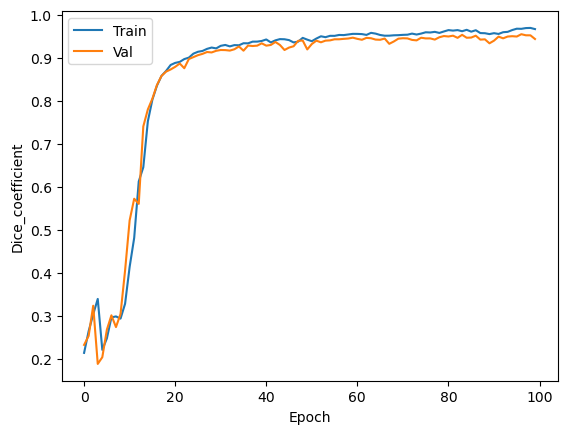

In [6]:
plot_dice(history)

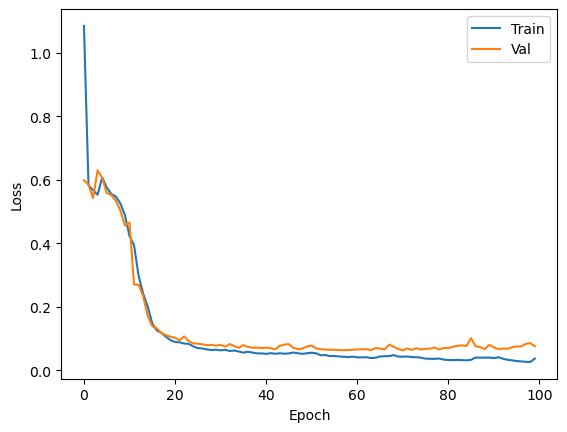

In [7]:
plot_loss(history)

# Show result

In [8]:
preds = seg_model.predict(x_test)

2/2 [==============================] - 1s 218ms/step


In [137]:
def find_seg(target,test,min_init,max_init,step,iter):
    acc_max = 0
    best_min = 1
    best_max = 0
    best_seg = target
    l = len(target)
    min = min_init
    for i in range(1,iter):
        min = min - step
        max = max_init
        print(i)
        print(acc_max)
        for j in range(1,iter):
            max = max + step
            copy = target.copy()
            seg = intensity_segment(copy,min,max)
            acc = 0
            for k in range(1,l):
                if seg[k] == test[k] and seg[k] == 0:
                    acc += 0.5
                if seg[k] == test[k] and seg[k] == 1:
                    acc += 1
            acc = acc / l
#             print(acc)
            if acc > acc_max:
                acc_max = acc
                best_min = min
                best_max = max
                best_seg = seg
    return acc_max,best_min,best_max,best_seg
        

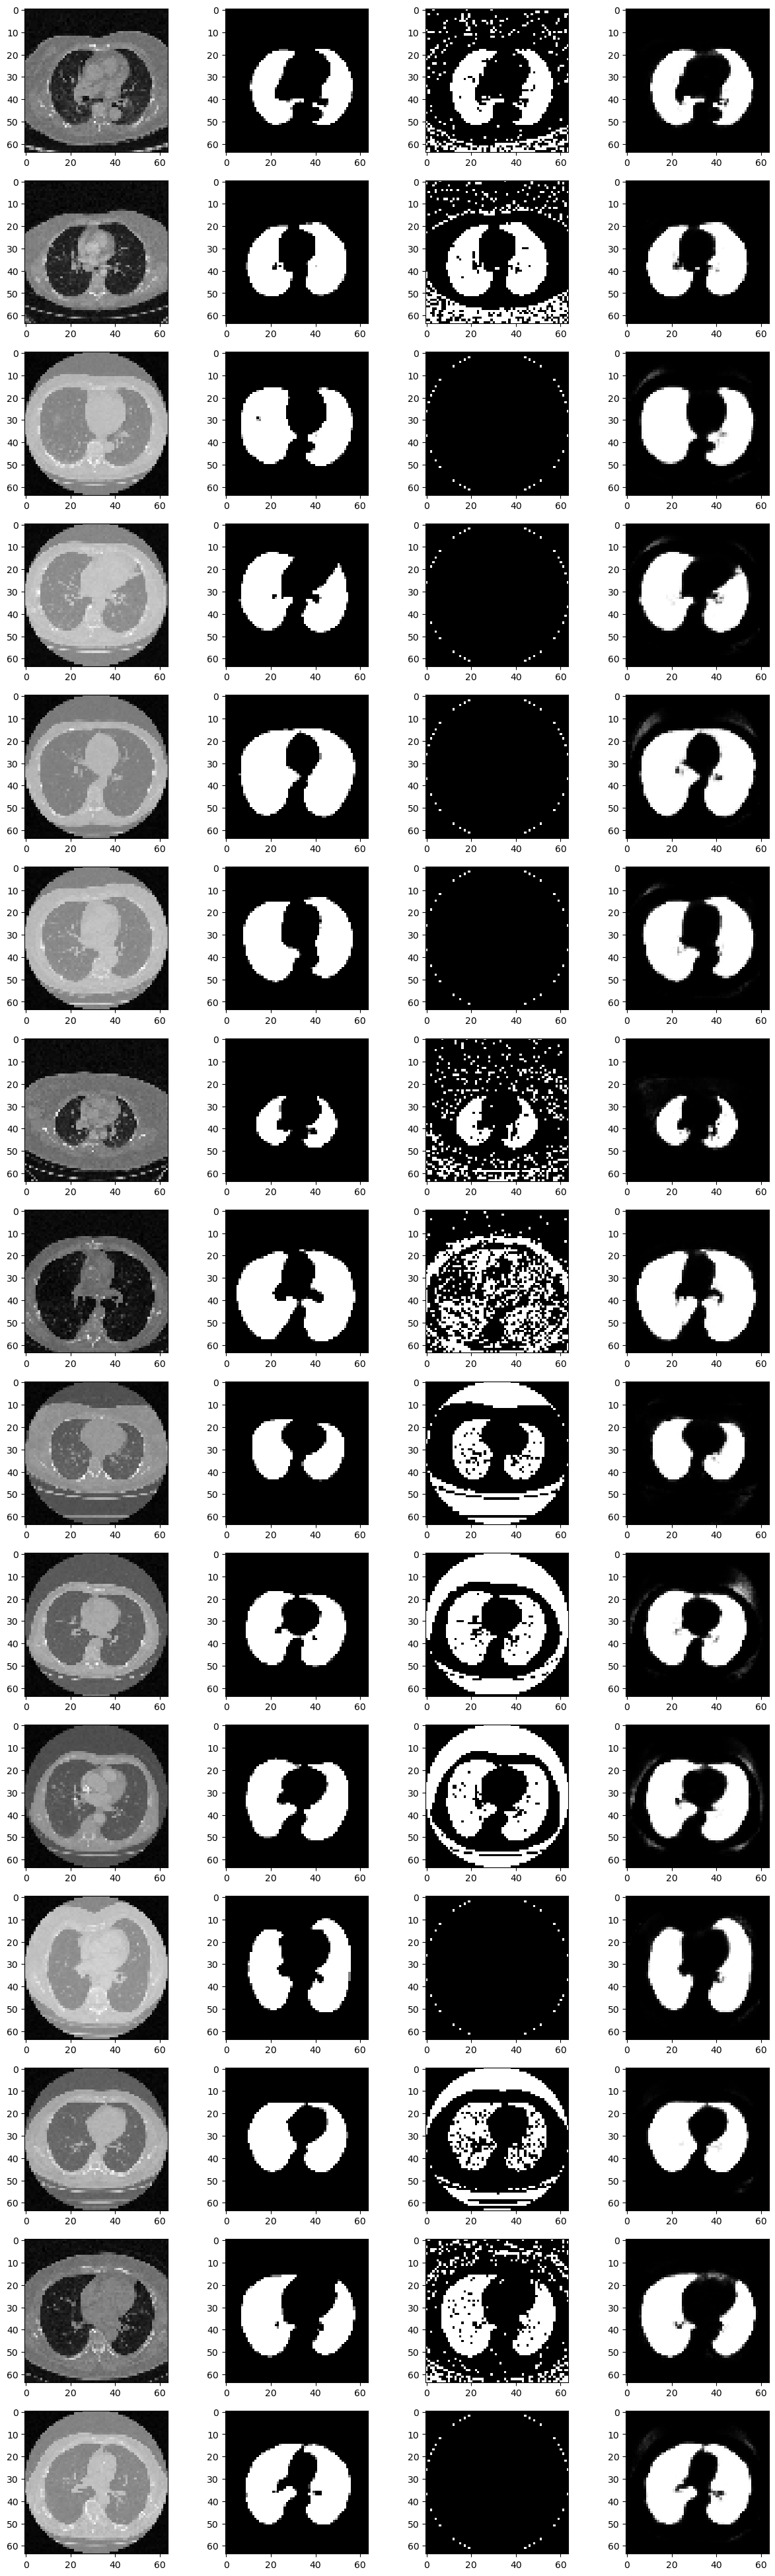

In [149]:
show_num = 15
fig, ax = plt.subplots(show_num, 4, figsize=(15, 50))
intense = x_test.copy()
intense_flatten = intense.flatten()
test_flatten = y_test.flatten()
# acc_max,best_min,best_max,best_seg = find_seg(intense_flatten,test_flatten,0.25,0.35,0.01,20)
# print(acc_max,best_min,best_max)
# a = intensity_segment(intense,best_min,best_max)
a = intensity_segment(intense,0.07,0.42)
for i, pred in enumerate(preds[:show_num]):
    ax[i, 0].imshow(x_test[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_test[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(a[i].squeeze(), cmap='gray')
    ax[i, 3].imshow(pred.squeeze(), cmap='gray')

In [141]:
print(acc_max,best_min,best_max)

0.4224921332465278 0.06999999999999992 0.36
